# A2Z insurance company customers' segmentation:

(c) Younes Abouljid 2022


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import random

In [2]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

# Load data

In [3]:
dataset = pd.read_sas('a2z_insurance.sas7bdat', format='sas7bdat')
dataset.describe(include='all')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10296.00000,10266.000000,10279.000000,10279,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,b'3 - BSc/MSc',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5148.50000,1991.062634,1968.007783,NaN,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,2972.34352,511.267913,19.709476,NaN,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1.00000,1974.000000,1028.000000,NaN,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2574.75000,1980.000000,1953.000000,NaN,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5148.50000,1986.000000,1968.000000,NaN,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7722.25000,1992.000000,1983.000000,NaN,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000


In [4]:
ds = dataset.copy()

# Explore data

In [5]:
ds.shape

(10296, 14)

In [6]:
ds.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [7]:
ds.tail()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91
10295,10296.0,1990.0,1981.0,b'4 - PhD',2815.0,1.0,1.0,463.75,0.27,414.08,94.45,141.25,6.89,12.89


In [8]:
ds.columns

Index(['CustID', 'FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal',
       'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork'],
      dtype='object')

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [10]:
ds.nunique()

CustID           10296
FirstPolYear        26
BirthYear           68
EducDeg              4
MonthSal          3565
GeoLivArea           4
Children             2
CustMonVal        7012
ClaimsRate         165
PremMotor         1950
PremHousehold     1061
PremHealth        1006
PremLife           611
PremWork           898
dtype: int64

# Dealing with Outliers for every float

Years

In [11]:
ds['FirstPolYear'].value_counts()

1988.0     512
1994.0     475
1993.0     473
1989.0     466
1984.0     464
1986.0     458
1978.0     453
1977.0     453
1992.0     451
1990.0     449
1995.0     445
1981.0     445
1982.0     444
1979.0     443
1996.0     440
1987.0     438
1976.0     433
1980.0     432
1991.0     430
1985.0     429
1983.0     423
1975.0     285
1997.0     271
1974.0     141
1998.0     112
53784.0      1
Name: FirstPolYear, dtype: int64

In [12]:
delete_row = ds[ds['FirstPolYear']==53784].index
ds = ds.drop(delete_row)
ds['FirstPolYear'].value_counts()

1988.0    512
1994.0    475
1993.0    473
1989.0    466
1984.0    464
1986.0    458
1977.0    453
1978.0    453
1992.0    451
1990.0    449
1981.0    445
1995.0    445
1982.0    444
1979.0    443
1996.0    440
1987.0    438
1976.0    433
1980.0    432
1991.0    430
1985.0    429
1983.0    423
1975.0    285
1997.0    271
1974.0    141
1998.0    112
Name: FirstPolYear, dtype: int64

In [13]:
ds['BirthYear'].value_counts()

1962.0    206
1968.0    200
1964.0    194
1953.0    193
1981.0    190
         ... 
1936.0     37
2000.0     35
1935.0     14
2001.0     12
1028.0      1
Name: BirthYear, Length: 68, dtype: int64

In [14]:
delete_row = ds[ds['BirthYear']==1028].index
ds = ds.drop(delete_row)
ds['BirthYear'].value_counts()

1962.0    206
1968.0    200
1964.0    194
1953.0    193
1981.0    190
         ... 
1937.0     57
1936.0     37
2000.0     35
1935.0     14
2001.0     12
Name: BirthYear, Length: 67, dtype: int64

Monthly Salaries and Costs

In [15]:
ds['MonthSal'].value_counts()

3200.0    10
2687.0    10
1398.0    10
3560.0    10
3776.0    10
          ..
1690.0     1
4263.0     1
2653.0     1
3236.0     1
2404.0     1
Name: MonthSal, Length: 3564, dtype: int64

In [16]:
ds['MonthSal'].value_counts()
delete_row = ds[ds['MonthSal']==55215].index
ds = ds.drop(delete_row)


In [17]:
delete_row = ds[ds['MonthSal']==34490].index
ds = ds.drop(delete_row)

In [18]:
ds.describe()

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10292.000000,10262.000000,10275.000000,10256.000000,10291.000000,10271.000000,10292.000000,10292.000000,10258.000000,10292.000000,10249.000000,10188.000000,10206.000000
mean,5147.524291,1986.015981,1968.100146,2498.303530,2.709649,0.706942,177.842620,0.742846,300.478312,210.443602,171.587097,41.850366,41.267308
std,2972.404170,6.611937,17.392435,984.589828,1.266233,0.455187,1946.184156,2.917525,211.938207,352.655609,296.462761,47.480686,51.508568
min,1.000000,1974.000000,1935.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2573.750000,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.465000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5146.500000,1986.000000,1968.000000,2500.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7721.250000,1992.000000,1983.000000,3290.000000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,10296.000000,1998.000000,2001.000000,5021.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [19]:
ds['CustMonVal'].value_counts()

-25.00     272
-31.00      12
-37.00      11
-35.00      11
-47.67      10
          ... 
 125.37      1
 232.16      1
 315.74      1
 619.45      1
 456.99      1
Name: CustMonVal, Length: 7009, dtype: int64

<AxesSubplot:ylabel='Frequency'>

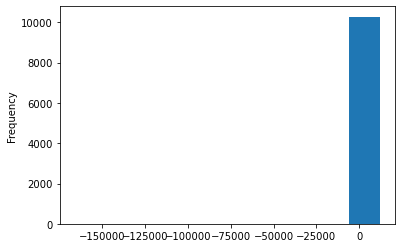

In [20]:
ds['CustMonVal'].plot(kind='hist')

In [23]:
ds[ds['CustMonVal']<=-500].count()

CustID           14
FirstPolYear     14
BirthYear        14
EducDeg          14
MonthSal         14
GeoLivArea       14
Children         14
CustMonVal       14
ClaimsRate       14
PremMotor        14
PremHousehold    14
PremHealth       14
PremLife         14
PremWork         14
dtype: int64

In [24]:
delete_row = ds[ds['CustMonVal']<-500].index
ds = ds.drop(delete_row)

In [21]:
ds[ds['CustMonVal']>=1500].count()

CustID           12
FirstPolYear     12
BirthYear        12
EducDeg          12
MonthSal         12
GeoLivArea       12
Children         12
CustMonVal       12
ClaimsRate       12
PremMotor        12
PremHousehold    12
PremHealth       12
PremLife         12
PremWork         12
dtype: int64

In [22]:
delete_row = ds[ds['CustMonVal']>=1500].index
ds = ds.drop(delete_row)

<AxesSubplot:>

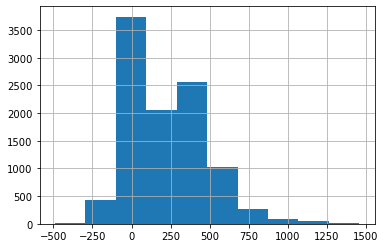

In [25]:
ds['CustMonVal'].hist()

Claims and Premiums

<AxesSubplot:>

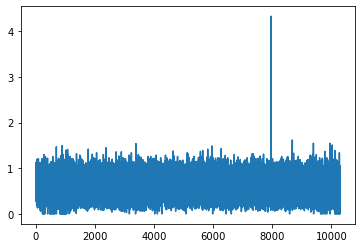

In [26]:
ds['ClaimsRate'].plot(kind='line')

In [27]:
delete_row = ds[ds['ClaimsRate']>2].index
ds = ds.drop(delete_row)

<AxesSubplot:>

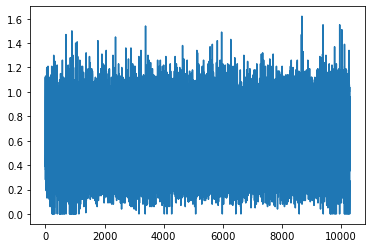

In [28]:
ds['ClaimsRate'].plot(kind='line')

<AxesSubplot:>

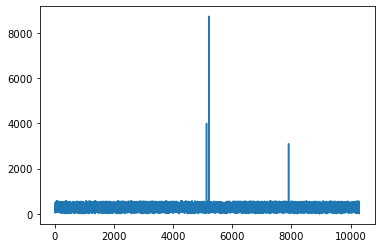

In [29]:
ds['PremMotor'].plot(kind='line')

In [30]:
delete_row = ds[ds['PremMotor']>600].index
ds = ds.drop(delete_row)

<AxesSubplot:>

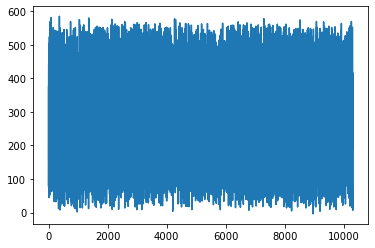

In [31]:
ds['PremMotor'].plot(kind='line')

<AxesSubplot:>

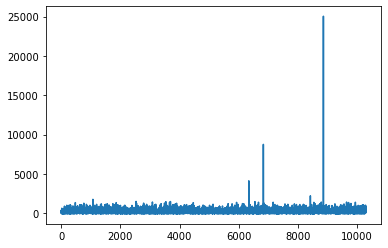

In [32]:
ds['PremHousehold'].plot(kind='line')

In [33]:
delete_row = ds[ds['PremHousehold']>1500].index
ds = ds.drop(delete_row)

<AxesSubplot:>

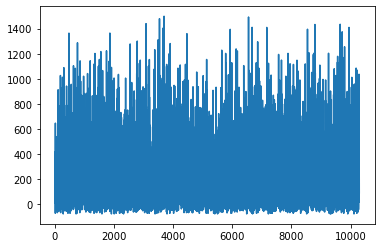

In [34]:
ds['PremHousehold'].plot(kind='line')

<AxesSubplot:>

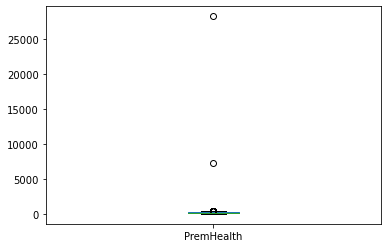

In [35]:
ds['PremHealth'].plot(kind='box')

In [36]:
delete_row = ds[ds['PremHealth']>1000].index
ds = ds.drop(delete_row)

<AxesSubplot:>

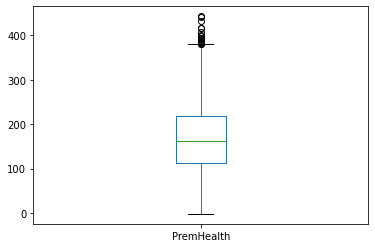

In [37]:
ds['PremHealth'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

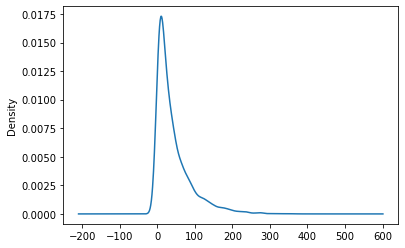

In [39]:
ds['PremLife'].plot(kind='kde')

<AxesSubplot:>

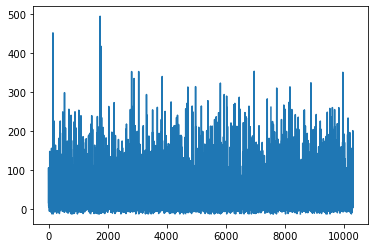

In [40]:
ds['PremWork'].plot(kind='line')

In [41]:
delete_row = ds[ds['PremWork']>400].index
ds = ds.drop(delete_row)

<AxesSubplot:>

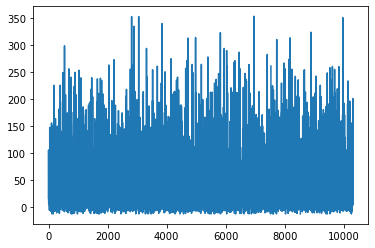

In [42]:
ds['PremWork'].plot(kind='line')

In [43]:
ds.describe(include='all')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10251.000000,10221.000000,10234.000000,10234,10215.000000,10250.000000,10230.000000,10251.000000,10251.000000,10218.000000,10251.000000,10209.000000,10147.000000,10165.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,b'3 - BSc/MSc',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5151.593698,1986.014578,1968.068106,NaN,2499.890162,2.709171,0.706940,216.997518,0.680303,297.299644,205.132036,168.070005,41.844626,40.831031
std,2970.210976,6.608087,17.371987,NaN,983.309211,1.266670,0.455188,254.713037,0.318659,137.839214,230.276036,74.115363,47.498322,46.357835
min,1.000000,1974.000000,1935.000000,NaN,333.000000,1.000000,0.000000,-490.200000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2583.500000,1980.000000,1953.000000,NaN,1708.000000,1.000000,0.000000,-9.220000,0.390000,191.370000,49.450000,111.910000,9.890000,10.670000
50%,5150.000000,1986.000000,1968.000000,NaN,2502.000000,3.000000,1.000000,187.040000,0.720000,298.610000,132.800000,162.920000,25.560000,25.670000
75%,7721.500000,1992.000000,1983.000000,NaN,3290.500000,4.000000,1.000000,398.865000,0.980000,408.022500,289.500000,219.820000,57.790000,56.120000


# Dealing with Missing Data

In [44]:
ds.isnull().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         33
PremHousehold      0
PremHealth        42
PremLife         104
PremWork          86
dtype: int64

In [45]:
# fill the missing values using the mode of the distribution
ds['EducDeg'].fillna(ds['EducDeg'].mode()[0], inplace=True)

In [46]:
#impute with median due to positive skewness
ds.PremLife = ds.PremLife.fillna(ds.PremLife.median())

<AxesSubplot:ylabel='Density'>

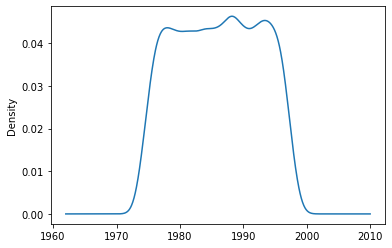

In [47]:
ds['FirstPolYear'].plot(kind='kde')

In [48]:
#impute with median due to positive skewness
ds.PremHealth = ds.PremHealth.fillna(ds.PremHealth.median())
ds.PremWork = ds.PremWork.fillna(ds.PremWork.median())
ds.PremMotor = ds.PremMotor.fillna(ds.PremMotor.median())

In [49]:
print(ds.MonthSal.mean())
print(ds.MonthSal.median())

2499.890161527166
2502.0


In [50]:
#impute with median/mean due to near symmetrical skewness
ds.MonthSal = ds.MonthSal.fillna(ds.MonthSal.median())

In [51]:
# since one we impute with the mode
ds.GeoLivArea = ds.GeoLivArea.fillna(ds.GeoLivArea.mode()[0])

In [52]:
ds.describe(include='all')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10251.000000,10221.000000,10234.000000,10251,10251.000000,10251.000000,10230.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,b'3 - BSc/MSc',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5151.593698,1986.014578,1968.068106,NaN,2499.897571,2.709297,0.706940,216.997518,0.680303,297.303862,205.132036,168.048904,41.679413,40.703839
std,2970.210976,6.608087,17.371987,NaN,981.580913,1.266672,0.455188,254.713037,0.318659,137.617167,230.276036,73.964092,47.284912,46.183658
min,1.000000,1974.000000,1935.000000,NaN,333.000000,1.000000,0.000000,-490.200000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2583.500000,1980.000000,1953.000000,NaN,1711.500000,1.000000,0.000000,-9.220000,0.390000,191.480000,49.450000,112.020000,9.890000,10.670000
50%,5150.000000,1986.000000,1968.000000,NaN,2502.000000,3.000000,1.000000,187.040000,0.720000,298.610000,132.800000,162.920000,25.560000,25.670000
75%,7721.500000,1992.000000,1983.000000,NaN,3289.000000,4.000000,1.000000,398.865000,0.980000,407.465000,289.500000,218.985000,57.010000,55.900000


Impute using random values from the distrubution for the two columns (BirthYear and FirstPolYear)

In [53]:
# copy the column
dff = ds['BirthYear']

In [54]:
#convert it to a dataframe for processing
df = dff.to_frame()

In [55]:
# impute using random values from its own distribution
df = df.apply(lambda x: x.fillna(random.choice(x.dropna()))) 

In [56]:
# replace the old column with the new one
ds['BirthYear'] = df['BirthYear']

In [57]:
# same process repeated here
dff1 = ds['FirstPolYear']

In [58]:
df1 = dff1.to_frame()

In [59]:
df1 = df1.apply(lambda x: x.fillna(random.choice(x.dropna()))) 

In [60]:
ds['FirstPolYear'] = df1['FirstPolYear']

In [61]:
# statistical values before imputation with random values
print("Mean is: "+str(ds.Children.mean()))
print("Median is: "+str(ds.Children.median()))
print("Mode is: "+str(ds.Children.median()))
print(ds['Children'].value_counts())


Mean is: 0.7069403714565005
Median is: 1.0
Mode is: 1.0
1.0    7232
0.0    2998
Name: Children, dtype: int64


In [62]:
dff = ds['Children']

df = dff.to_frame()

df = df.apply(lambda x: x.fillna(random.choice(x.dropna()))) 

ds['Children'] = df['Children']


In [63]:
# statistical values after imputation with random values
print(ds['Children'].value_counts())
print("Mean is: "+str(ds.Children.mean()))
print("Median is: "+str(ds.Children.median()))
print("Mode is: "+str(ds.Children.median()))

1.0    7253
0.0    2998
Name: Children, dtype: int64
Mean is: 0.7075407277338797
Median is: 1.0
Mode is: 1.0


# Creating new variables

CMVClasses

In [64]:
ds.loc[(ds['CustMonVal'] > 0), 'CMVClasses'] = 1
ds.loc[(ds['CustMonVal'] == 0), 'CMVClasses'] = 0
ds.loc[(ds['CustMonVal'] < 0), 'CMVClasses'] = -1

ds.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CMVClasses
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,1.0
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,-1.0
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,1.0
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,-1.0
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,1.0


Age

In [65]:
ds['Age'] = 2016 - ds['BirthYear']

In [66]:
ds['YearsAsCustomer'] = 2016 - ds['FirstPolYear']

<AxesSubplot:ylabel='Frequency'>

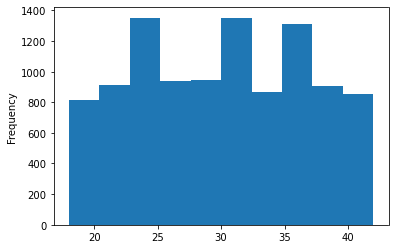

In [67]:
ds['YearsAsCustomer'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

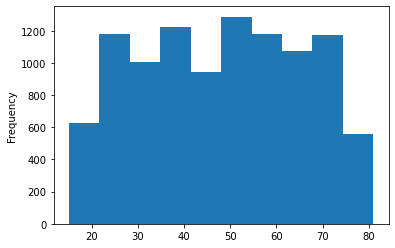

In [68]:
ds['Age'].plot(kind='hist')

AgeGroup

In [69]:
# Add new column to seperate age groups to 4 classes 
ds.loc[(ds['BirthYear'] >= 1996) & (ds['BirthYear'] <= 2001), 'AgeGroup'] = 'Teens'
ds.loc[(ds['BirthYear'] >= 1976) & (ds['BirthYear'] < 1996), 'AgeGroup'] = 'Young Adults'
ds.loc[(ds['BirthYear'] >= 1956) & (ds['BirthYear'] < 1976), 'AgeGroup'] = 'Middle-aged Adults'
ds.loc[(ds['BirthYear'] < 1956), 'AgeGroup'] = 'Old Adults'



ds.head()



,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CMVClasses,Age,YearsAsCustomer,AgeGroup
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,1.0,34.0,31.0,Young Adults
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,-1.0,21.0,35.0,Young Adults
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,1.0,46.0,25.0,Middle-aged Adults
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,-1.0,35.0,26.0,Young Adults
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,1.0,43.0,30.0,Middle-aged Adults


<AxesSubplot:xlabel='AgeGroup', ylabel='Count'>

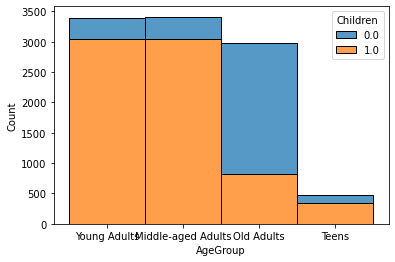

In [70]:
#see age groups in accordance with children
sns.histplot(binwidth=0.5, x="AgeGroup", hue="Children", data=ds, stat="count", multiple="stack")

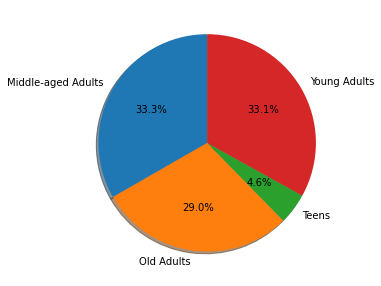

In [71]:
tempDF = ds.groupby('AgeGroup').agg('count')

# Draw
fig, ax = plt.subplots(figsize=(8,5))
ax.pie(tempDF.Children.to_list(), labels=tempDF.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90);

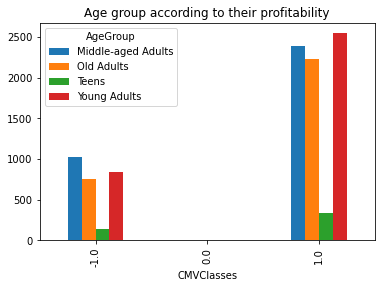

In [72]:
ff1 = ds.groupby(['CMVClasses'])['AgeGroup'].value_counts().unstack()

ax3 = ff1.plot(kind='bar',stacked = False, title='Age group according to their profitability')

# interesting here we can focus on the old adults since they have less negative profits and close to the median of the positive of middle age adults

# theory N1: maybe old adults have less incidents 

IsDateValid variable 

In [73]:
# creating a new flag variable that determines whether the dates of first policy year is bigger than date of birth
ds['isDateValid'] = np.where((ds['FirstPolYear']<=ds['BirthYear']), 0, 1)
ds['isDateValid'].value_counts()

1    8094
0    2157
Name: isDateValid, dtype: int64

old values
1    8111
0    2140
new values
1    8098
0    2153


In [74]:
ds.describe(include='all')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CMVClasses,Age,YearsAsCustomer,AgeGroup,isDateValid
count,10251.000000,10251.000000,10251.000000,10251,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251,10251.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,b'3 - BSc/MSc',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle-aged Adults,NaN
freq,NaN,NaN,NaN,4798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3413,NaN
mean,5151.593698,1986.023315,1968.102819,NaN,2499.897571,2.709297,0.707541,216.997518,0.680303,297.303862,205.132036,168.048904,41.679413,40.703839,0.463662,47.897181,29.976685,NaN,0.789582
std,2970.210976,6.600380,17.378461,NaN,981.580913,1.266672,0.454914,254.713037,0.318659,137.617167,230.276036,73.964092,47.284912,46.183658,0.885945,17.378461,6.600380,NaN,0.407626
min,1.000000,1974.000000,1935.000000,NaN,333.000000,1.000000,0.000000,-490.200000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,-1.000000,15.000000,18.000000,NaN,0.000000
25%,2583.500000,1980.000000,1953.000000,NaN,1711.500000,1.000000,0.000000,-9.220000,0.390000,191.480000,49.450000,112.020000,9.890000,10.670000,-1.000000,33.000000,24.000000,NaN,1.000000
50%,5150.000000,1986.000000,1968.000000,NaN,2502.000000,3.000000,1.000000,187.040000,0.720000,298.610000,132.800000,162.920000,25.560000,25.670000,1.000000,48.000000,30.000000,NaN,1.000000
75%,7721.500000,1992.000000,1983.000000,NaN,3289.000000,4.000000,1.000000,398.865000,0.980000,407.465000,289.500000,218.985000,57.010000,55.900000,1.000000,63.000000,36.000000,NaN,1.000000


Create aggregation of all premiums into one **TotalPremiums**

In [75]:
column_names = ['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']
ds['TotalPremiums']= ds[column_names].sum(axis=1)

In [76]:
ds.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CMVClasses,Age,YearsAsCustomer,AgeGroup,isDateValid,TotalPremiums
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,1.0,34.0,31.0,Young Adults,1,665.56
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,-1.0,21.0,35.0,Young Adults,0,910.96
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,1.0,46.0,25.0,Middle-aged Adults,1,740.60
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,-1.0,35.0,26.0,Young Adults,1,600.68
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,1.0,43.0,30.0,Middle-aged Adults,1,629.24


New variable for Amount paid by the insurance company = total premiums * claims rate ()

In [77]:
ds['AmountPaid'] = ds['TotalPremiums'] * ds['ClaimsRate']

In [78]:
ds.dtypes

CustID             float64
FirstPolYear       float64
BirthYear          float64
EducDeg             object
MonthSal           float64
GeoLivArea         float64
Children           float64
CustMonVal         float64
ClaimsRate         float64
PremMotor          float64
PremHousehold      float64
PremHealth         float64
PremLife           float64
PremWork           float64
CMVClasses         float64
Age                float64
YearsAsCustomer    float64
AgeGroup            object
isDateValid          int32
TotalPremiums      float64
AmountPaid         float64
dtype: object

# Analysis with new variables

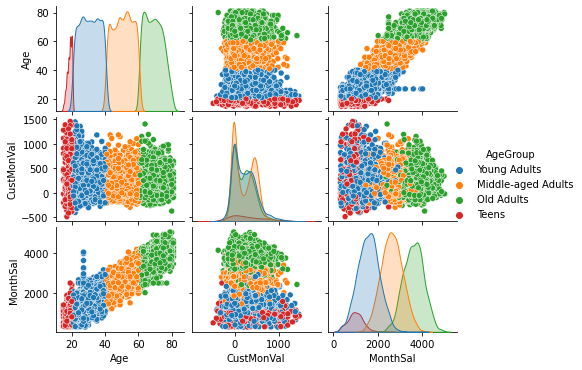

In [79]:
cols = ['Age','CustMonVal','MonthSal','AgeGroup']
g = sns.pairplot(ds[cols], hue='AgeGroup')
g.fig.set_size_inches(8,5)

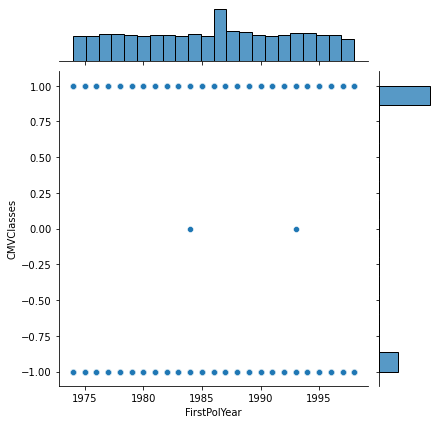

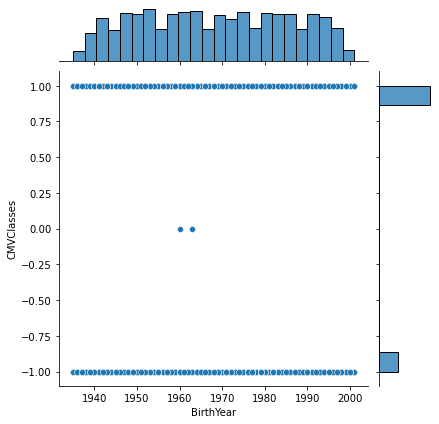

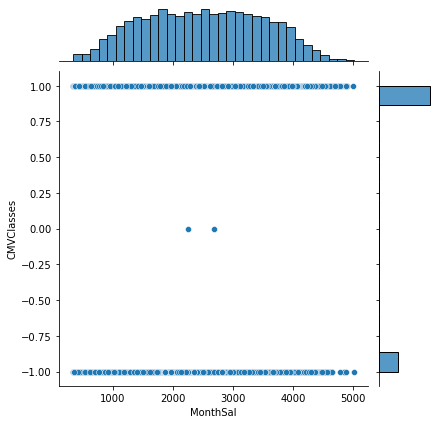

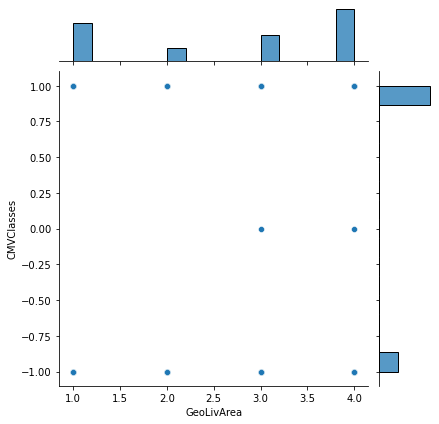

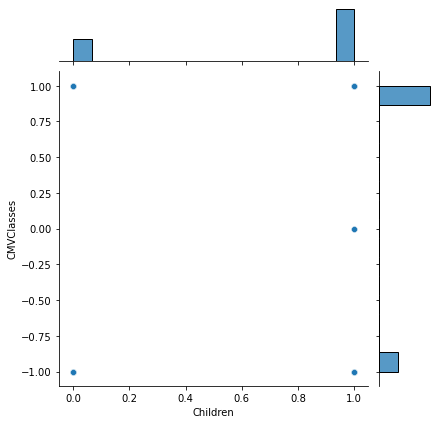

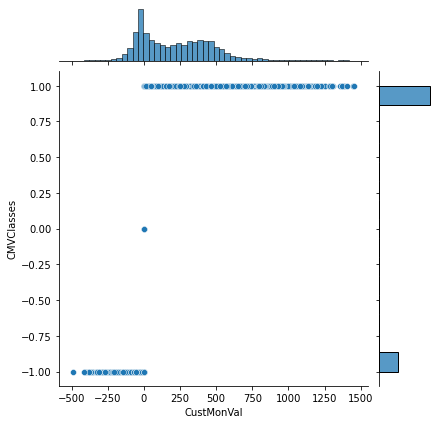

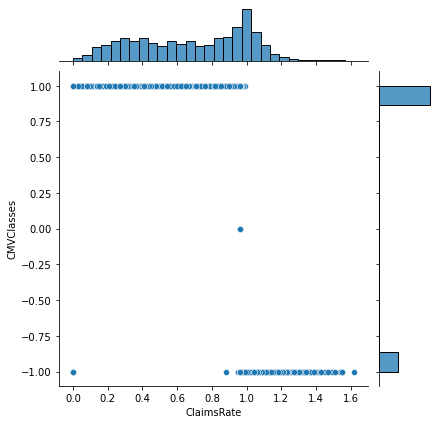

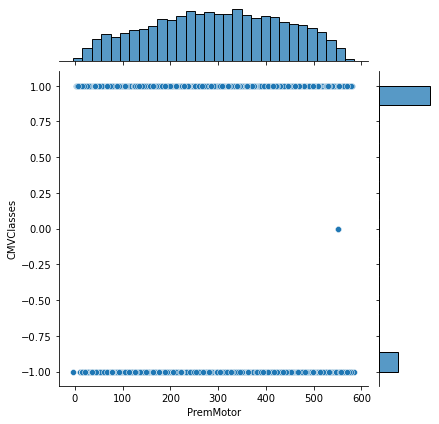

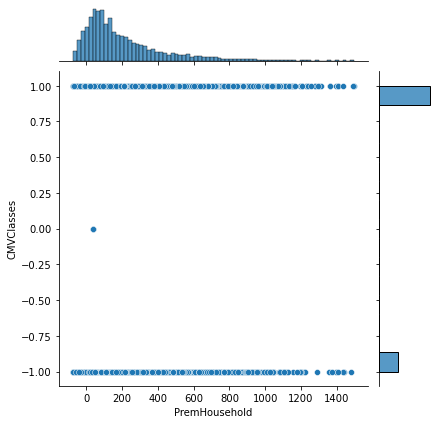

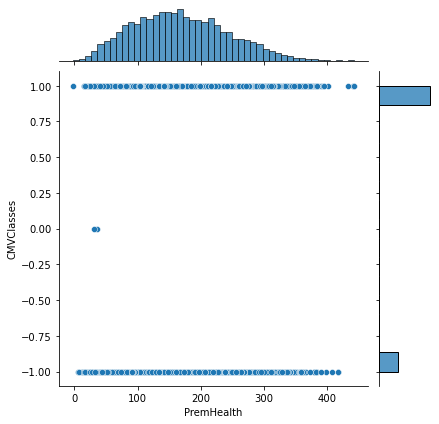

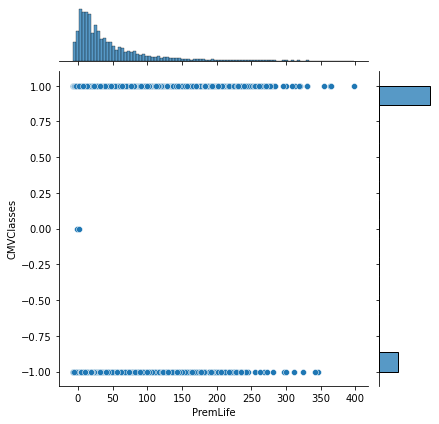

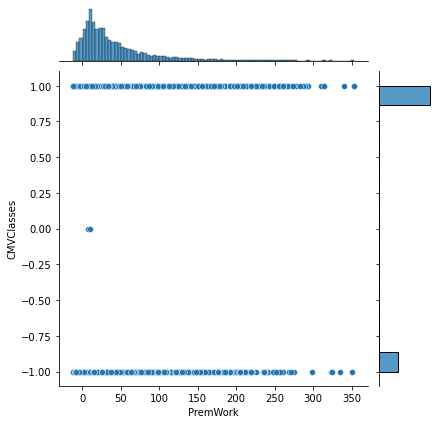

In [80]:
numerical_features=['FirstPolYear','BirthYear','MonthSal','GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']
for feature in numerical_features:
    sns.jointplot(x=ds[feature], y=ds['CMVClasses'])

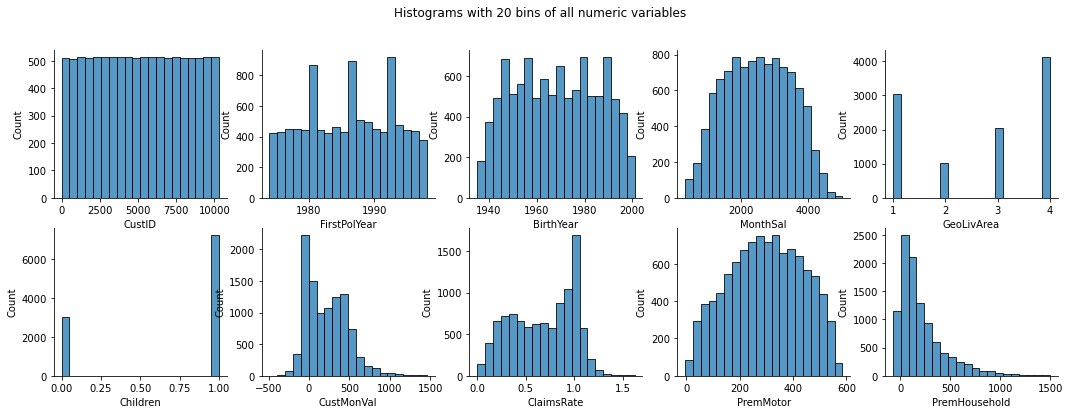

In [81]:
# HISTOGRAM (ALL NUMERIC VARIABLES)
subPlots_label_fontSize = 10
plots_Title_fontSize = 12

# Identify all numeric variables in the dataset
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,6))#2 rows and 5 collumns
for var, subplot in zip(ds[numerical], ax.flatten()):
    g = sns.histplot(data=ds,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=plots_Title_fontSize);

# Save to file
#fig.savefig(fname=exportsFolder+'MultipleHistogram.svg', bbox_inches="tight")


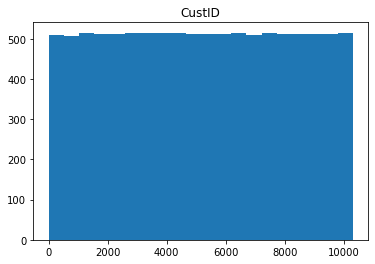

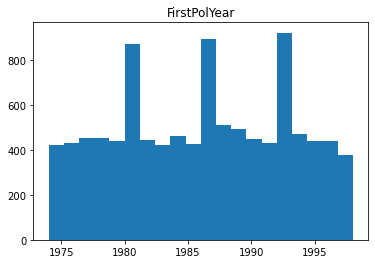

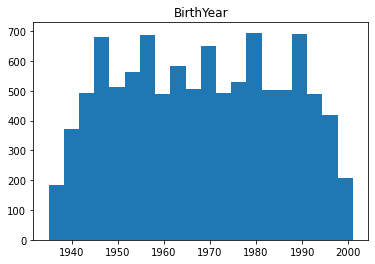

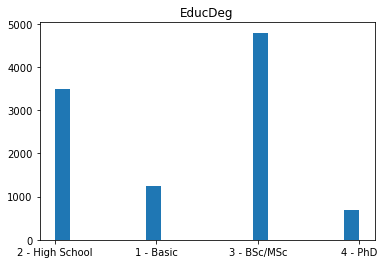

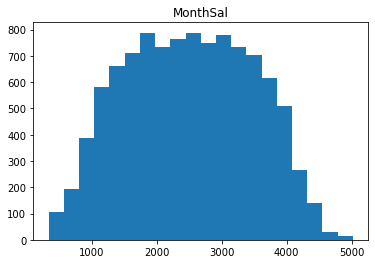

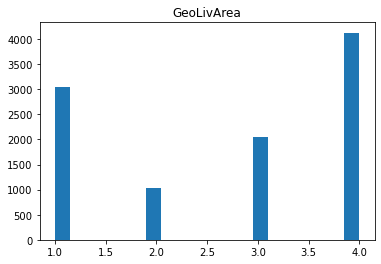

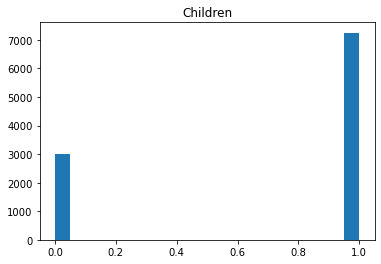

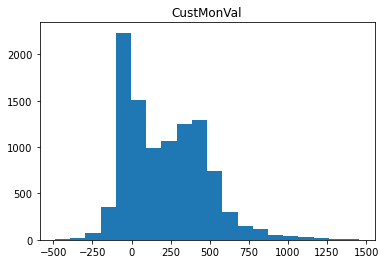

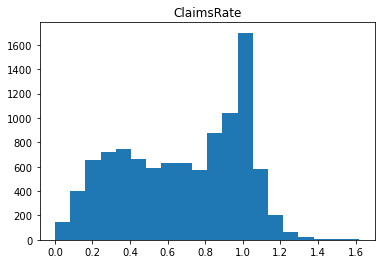

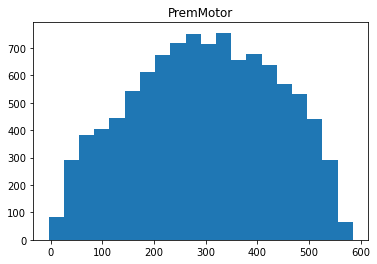

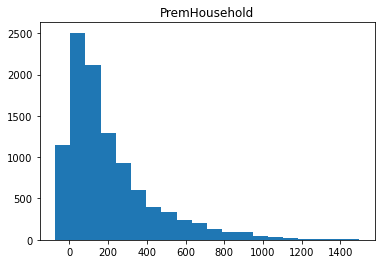

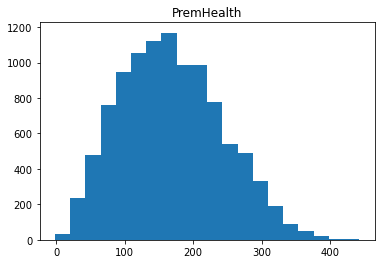

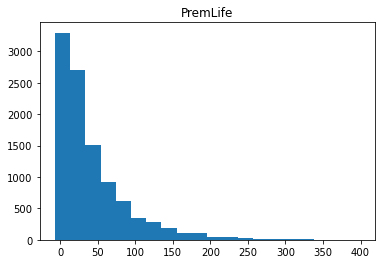

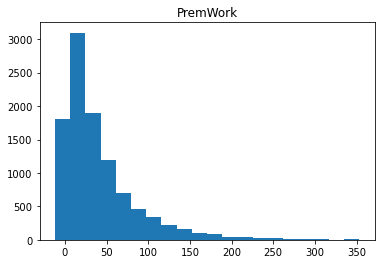

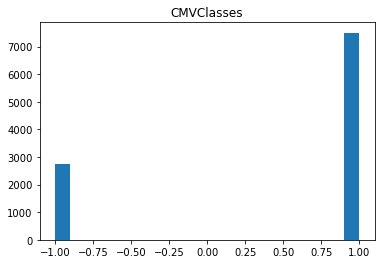

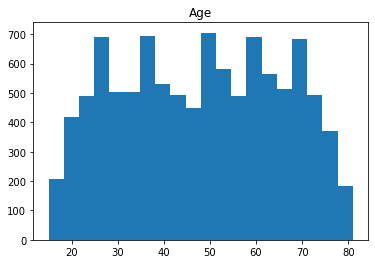

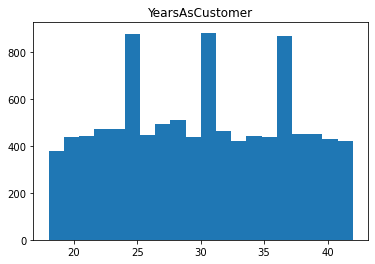

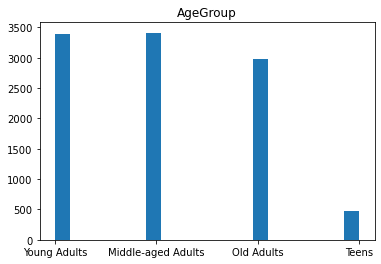

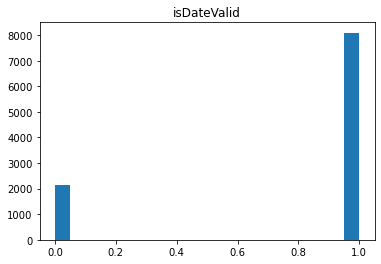

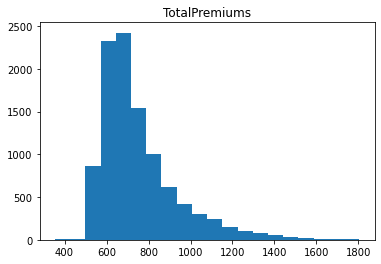

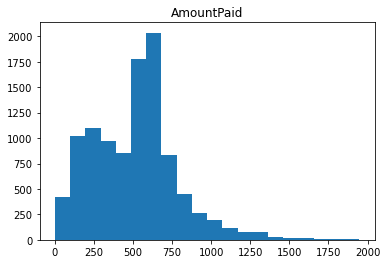

In [82]:
# histogram plot of all variables in the dataframe
for column in ds.columns:
    plt.hist(ds[column], bins=20)
    #plt.axvline(UpColours07_Num[column])
    plt.title(column)
    plt.show()

<ipython-input-83-8c00f5c9fa4d>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


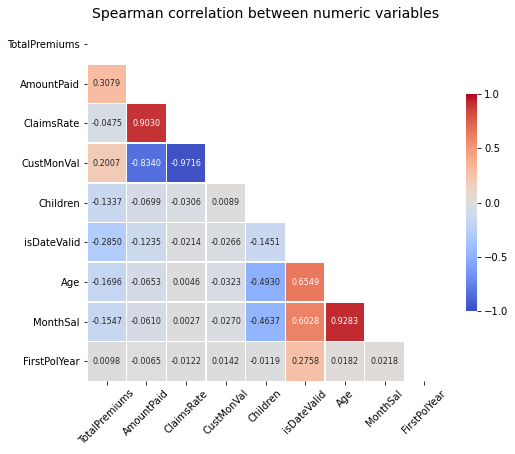

In [83]:
# CORRELATION 

column_names = ['TotalPremiums','AmountPaid','ClaimsRate','CustMonVal','Children','isDateValid','Age','MonthSal','FirstPolYear']


#definition
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8



# Create correlation matrix
corr = ds[column_names].corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(8, 10))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.4f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})

# Decoration
plt.title("Spearman correlation between numeric variables", fontsize=plots_Title_fontSize)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

**Conclusions**
 Monthly salaray is highly correlated with the age  almost linear 
 Amount paid is high correlated with claims rate 
 Age with the date valid 
 MonthSal with the date valid 
 
**Negative correlations**
 CustMon Value with claims rate 
 CustMon value with amount paid 
 
**Important to consider these variables for our model**

In [84]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10251.0,NaN,NaN,NaN,5151.593698,2970.210976,1.0,2583.5,5150.0,7721.5,10296.0
FirstPolYear,10251.0,NaN,NaN,NaN,1986.023315,6.60038,1974.0,1980.0,1986.0,1992.0,1998.0
BirthYear,10251.0,NaN,NaN,NaN,1968.102819,17.378461,1935.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10251,4,b'3 - BSc/MSc',4798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10251.0,NaN,NaN,NaN,2499.897571,981.580913,333.0,1711.5,2502.0,3289.0,5021.0
GeoLivArea,10251.0,NaN,NaN,NaN,2.709297,1.266672,1.0,1.0,3.0,4.0,4.0
Children,10251.0,NaN,NaN,NaN,0.707541,0.454914,0.0,0.0,1.0,1.0,1.0
CustMonVal,10251.0,NaN,NaN,NaN,216.997518,254.713037,-490.2,-9.22,187.04,398.865,1455.94
ClaimsRate,10251.0,NaN,NaN,NaN,0.680303,0.318659,0.0,0.39,0.72,0.98,1.62
PremMotor,10251.0,NaN,NaN,NaN,297.303862,137.617167,-4.11,191.48,298.61,407.465,585.22


<AxesSubplot:>

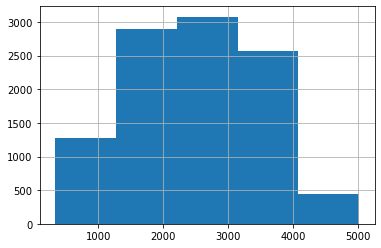

In [85]:
#ds['CustMonVal'].plot(kind='kde')
ds['MonthSal'].hist(bins=5)

## Modeling

In [86]:
import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib import ticker


**FEATURE ENGINEERING**

In [87]:
A = ds.copy()
A['age_bins'] = pd.cut(x=A['Age'], bins=[0, 19, 29, 39, 49, 59, 69, 79, 99], labels=['<20','20-29','30-39','40-49','50-59','60-69','70-79','>=80'])
A['cmv_bins'] = pd.cut(x=A['CustMonVal'], bins=[-500, 0, 500, 1000, 1500], labels=['<0','0-500','500-1000','1000-1500'])
A['premiums_bins'] = pd.cut(x=A['TotalPremiums'], bins=[0, 700, 1100,2000], labels=['0-700','700-1100','>1100'])
A['claims_bins'] = pd.cut(x=A['ClaimsRate'], bins=[0.0, 0.4, 0.8, 1.2, 2.0], labels=['0.0-0.4','0.4-0.8','0.8-1.2','>1.2'])
A['ysc_bins'] = pd.cut(x=A['YearsAsCustomer'], bins=[0, 19, 29, 39, 99], labels=['<20','20-29','30-39','>=40'])
A['monthSal_bins'] = pd.cut(x=A['MonthSal'], bins=[0, 999, 1999, 2999, 3999, 4999, 6999], labels=['<1000','1000-1999','2000-2999','3000-3999','4000-4999','>=5000'])

A.shape


(10251, 27)

In [88]:
A_Analysis = A.copy(deep=True)

In [89]:
cols = ['CustID','GeoLivArea','PremMotor','BirthYear','PremHousehold','PremHealth','PremLife','PremWork',
        'Age','CustMonVal','FirstPolYear','AgeGroup','AmountPaid', 'TotalPremiums', 'CMVClasses',
        'cmv_bins','ClaimsRate','YearsAsCustomer','Children','monthSal_bins','MonthSal']

A.drop(columns=cols, inplace=True)

In [90]:
A.shape

(10251, 6)

In [91]:
cols = ['age_bins','premiums_bins','claims_bins','EducDeg','ysc_bins'] 
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
A = ce_one_hot.fit_transform(A)

In [92]:
A.head()

,EducDeg_b'2 - High School',EducDeg_b'1 - Basic',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',isDateValid,age_bins_<20,age_bins_20-29,age_bins_30-39,age_bins_40-49,age_bins_50-59,...,premiums_bins_>1100,claims_bins_0.0-0.4,claims_bins_0.4-0.8,claims_bins_0.8-1.2,claims_bins_>1.2,claims_bins_nan,ysc_bins_<20,ysc_bins_20-29,ysc_bins_30-39,ysc_bins_>=40
0,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [93]:
A_beforeNorm = A.copy(deep=True)


In [94]:
# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
A = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(A.values), columns=A.columns,index=A.index)



In [95]:
# Check dataframe structure and statistics after all transformations
print(A.shape)
A.describe(include='all').T


(10251, 25)


,count,mean,std,min,25%,50%,75%,max
EducDeg_b'2 - High School',10251.0,0.341333,0.474180,0.0,0.0,0.0,1.0,1.0
EducDeg_b'1 - Basic',10251.0,0.122720,0.328131,0.0,0.0,0.0,0.0,1.0
EducDeg_b'3 - BSc/MSc',10251.0,0.468052,0.499003,0.0,0.0,0.0,1.0,1.0
EducDeg_b'4 - PhD',10251.0,0.067896,0.251579,0.0,0.0,0.0,0.0,1.0
isDateValid,10251.0,0.789582,0.407626,0.0,1.0,1.0,1.0,1.0
age_bins_<20,10251.0,0.032875,0.178318,0.0,0.0,0.0,0.0,1.0
age_bins_20-29,10251.0,0.159692,0.366338,0.0,0.0,0.0,0.0,1.0
age_bins_30-39,10251.0,0.167691,0.373610,0.0,0.0,0.0,0.0,1.0
age_bins_40-49,10251.0,0.162423,0.368857,0.0,0.0,0.0,0.0,1.0
age_bins_50-59,10251.0,0.170032,0.375679,0.0,0.0,0.0,0.0,1.0


In [96]:
# Let's use PCA to visualize with only two components
pca2 = PCA(n_components = 2)
pca2.fit(A)
X_pca2 = pca2.transform(A)
print(X_pca2.shape)


(10251, 2)


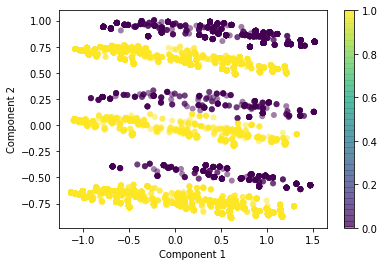

In [97]:
# totalpremiums, claimsrate, age_bins, education, cmv_bins

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=A.isDateValid, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [98]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10251 entries, 0 to 10295
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EducDeg_b'2 - High School'  10251 non-null  float64
 1   EducDeg_b'1 - Basic'        10251 non-null  float64
 2   EducDeg_b'3 - BSc/MSc'      10251 non-null  float64
 3   EducDeg_b'4 - PhD'          10251 non-null  float64
 4   isDateValid                 10251 non-null  float64
 5   age_bins_<20                10251 non-null  float64
 6   age_bins_20-29              10251 non-null  float64
 7   age_bins_30-39              10251 non-null  float64
 8   age_bins_40-49              10251 non-null  float64
 9   age_bins_50-59              10251 non-null  float64
 10  age_bins_60-69              10251 non-null  float64
 11  age_bins_70-79              10251 non-null  float64
 12  age_bins_>=80               10251 non-null  float64
 13  premiums_bins_0-700         102

In [99]:
# Fit the PCA algorithm to data 
pca = PCA().fit(A)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(A.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.169407,0.169407
1,2,0.129959,0.299366
2,3,0.109896,0.409262
3,4,0.095210,0.504472
4,5,0.079401,0.583873
5,6,0.069231,0.653104
6,7,0.049502,0.702606
7,8,0.048160,0.750766
8,9,0.046046,0.796812
9,10,0.045022,0.841834


Text(0.5, 1.0, 'Explained variance by components')

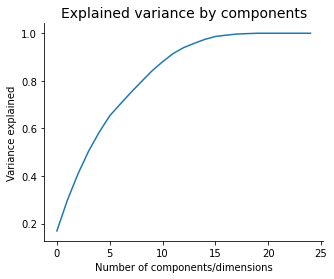

In [100]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.title('Explained variance by components', fontsize=plots_Title_fontSize)

With 14 components is possible to explain 96% of the variance.

## Modeling - K-Means - 14 Components


In [101]:
# Apply the dimension reduction to the dataset (for 14 components)
pca_reduced = PCA(n_components = 14)
pca_reduced.fit(A)
X_pca_reduced = pca_reduced.transform(A) 
print(X_pca_reduced.shape)

(10251, 14)


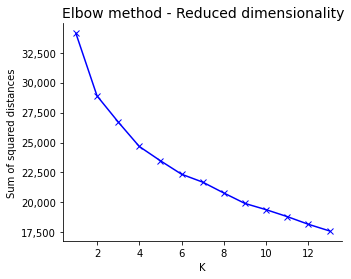

In [102]:
# Select K based on the sum of squared distances - Elbow method
ssd = []
K = range(1,14)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(X_pca_reduced)
    ssd.append(km.inertia_)
    
# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(K, ssd, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Elbow method - Reduced dimensionality', fontsize=plots_Title_fontSize);

From the Elbow method the K seems to be 5 because  it is where there is a curve in
the graph, that shows stops rapidly decreasing

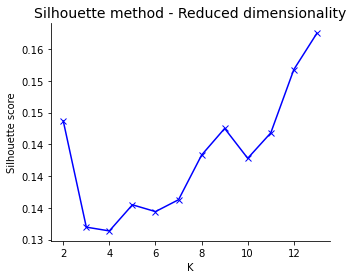

In [103]:
# Select K based on the Silhouette method
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 14):
  km = KMeans(n_clusters = k, random_state=123).fit(A)
  labels = km.labels_
  sil.append(silhouette_score(A, labels, metric = 'euclidean'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 14), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality', fontsize=plots_Title_fontSize);

From the Silhoutte method the K seems to be 13 because it is the higher value in the graph

For our Strategy we choose to go with K = 5 since for marketing customer segmentation a lower K would be better

In [104]:
# Apply the K-Means for K=5
K=5
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(X_pca_reduced)
A_forhier = X_pca_reduced # keep a version for hierarichal clustering
y_kmeans = kmeans.predict(X_pca_reduced)

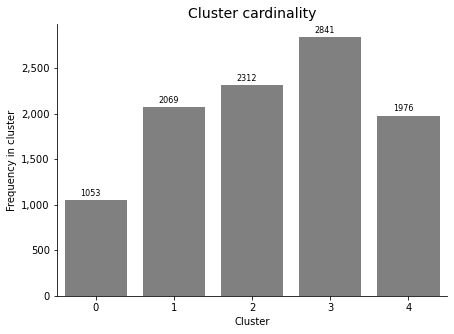

In [105]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = A_beforeNorm.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

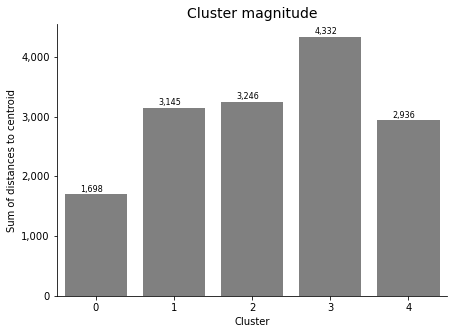

In [106]:
# Plot clusters magnitude

# Compute Magnitude
A['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = A['distanceToCentroid'].groupby(y_kmeans).sum()
A = A.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

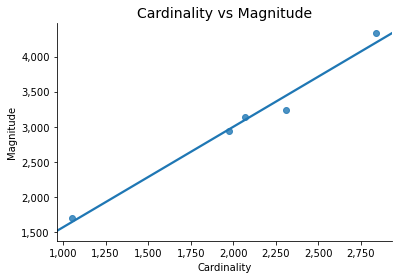

In [107]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Cardinality is correlated to magnitude, therefore no major anomalies seems to exist in clusters.

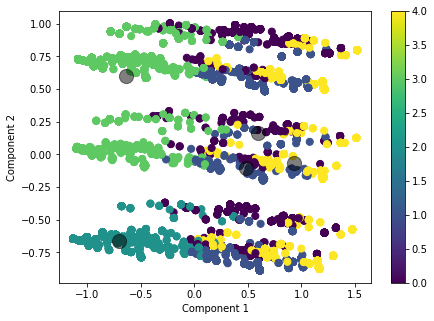

In [108]:
# Scatter plot of the two Principal Components by cluster to see if there is any pattern

# Draw
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Decoration
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

we have 0 to 5 colors that explains 30% of the cumulative variance for the 2 components

In [109]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=A.columns)
wheightsDF

,EducDeg_b'2 - High School',EducDeg_b'1 - Basic',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',isDateValid,age_bins_<20,age_bins_20-29,age_bins_30-39,age_bins_40-49,age_bins_50-59,...,premiums_bins_>1100,claims_bins_0.0-0.4,claims_bins_0.4-0.8,claims_bins_0.8-1.2,claims_bins_>1.2,claims_bins_nan,ysc_bins_<20,ysc_bins_20-29,ysc_bins_30-39,ysc_bins_>=40
0,0.249101,0.097427,-0.308085,-0.038443,-1.773543e-01,0.037661,0.145030,-0.002557,-0.129293,-0.078518,...,0.036672,-0.107675,0.298920,-0.190247,0.000470,-0.001468,0.000693,-0.028710,0.018249,0.009768
1,-0.002226,0.011784,-0.014021,0.004464,-2.010782e-01,0.015303,0.053342,0.016526,0.005274,-0.007041,...,0.024124,0.018985,-0.054811,0.035413,0.000410,0.000004,-0.001795,-0.690528,0.681767,0.010556
2,0.499002,0.030066,-0.561474,0.032405,-4.396898e-02,0.021851,0.035558,-0.013807,0.032165,0.011094,...,0.065719,-0.174755,-0.324987,0.497182,0.003381,-0.000821,0.001201,0.046602,-0.053638,0.005835
3,0.354389,-0.047684,-0.359214,0.052508,1.186363e-01,-0.011073,-0.102237,-0.016727,0.094844,0.085542,...,0.010661,0.447741,0.151763,-0.609102,0.007239,0.002359,0.002369,-0.008070,0.024533,-0.018832
4,-0.223322,0.244646,-0.035599,0.014275,-5.267425e-01,0.094470,0.410410,0.061553,-0.061159,-0.101463,...,0.192531,0.373668,-0.299186,-0.087749,0.010680,0.002587,-0.008968,0.118345,-0.148131,0.038753
5,0.006333,0.032720,-0.050027,0.010975,-2.838574e-01,0.018869,0.201586,0.162229,-0.074732,-0.213956,...,0.023890,-0.492464,0.564353,-0.082241,0.007453,0.002899,-0.014730,0.047387,-0.052272,0.019615
6,-0.253234,0.385838,-0.203873,0.071270,8.783805e-02,0.083393,0.098624,-0.698813,0.110797,-0.025825,...,0.148184,-0.079704,0.084929,-0.016714,0.009684,0.001805,0.005089,-0.013797,0.026875,-0.018168
7,-0.077573,0.101543,-0.036165,0.012195,1.917470e-02,0.016726,0.041344,-0.163872,-0.374572,0.800003,...,0.005404,-0.105594,0.098867,0.003579,0.004586,-0.001437,0.006897,0.007454,0.006139,-0.020490
8,-0.139440,0.195942,-0.164592,0.108090,-8.471494e-04,0.053657,-0.247462,0.395840,-0.604501,0.034217,...,0.059497,0.049547,-0.050307,-0.001121,0.002898,-0.001017,0.003791,-0.030949,-0.015394,0.042551
9,-0.333264,0.461128,-0.279055,0.151190,1.470098e-01,0.102891,-0.404814,0.294464,0.291553,-0.100671,...,0.007690,-0.048698,0.033565,0.010744,0.005369,-0.000980,-0.001326,-0.001602,0.040332,-0.037403


In [110]:
# Study the weights of component 14
comp = abs(wheightsDF.iloc[13])  ## index 13 is component 14
comp = comp.sort_values(ascending=False)
comp

premiums_bins_>1100           0.610314
EducDeg_b'4 - PhD'            0.475822
EducDeg_b'1 - Basic'          0.392323
premiums_bins_0-700           0.359882
premiums_bins_700-1100        0.250433
isDateValid                   0.119522
EducDeg_b'2 - High School'    0.087358
ysc_bins_<20                  0.074231
claims_bins_0.4-0.8           0.070839
age_bins_40-49                0.066281
age_bins_70-79                0.063774
claims_bins_0.0-0.4           0.052661
age_bins_60-69                0.049820
age_bins_30-39                0.046961
ysc_bins_20-29                0.043731
age_bins_50-59                0.036053
claims_bins_>1.2              0.035290
ysc_bins_30-39                0.029030
age_bins_20-29                0.028566
claims_bins_0.8-1.2           0.019173
age_bins_<20                  0.009263
EducDeg_b'3 - BSc/MSc'        0.003859
age_bins_>=80                 0.002128
claims_bins_nan               0.002061
ysc_bins_>=40                 0.001470
Name: 13, dtype: float64

### Interpret clusters results


In [111]:
# Check the mean values of each cluster for top 30 relevant features
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(A_beforeNorm[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3,4
premiums_bins_>1100,0.453941,0.002900,0.006488,0.006336,0.068320
EducDeg_b'4 - PhD',0.012346,0.067666,0.108131,0.103133,0.000000
EducDeg_b'1 - Basic',0.821462,0.079265,0.046713,0.042591,0.000000
premiums_bins_0-700,0.041785,0.000000,0.993512,0.993664,0.002024
premiums_bins_700-1100,0.504274,0.997100,0.000000,0.000000,0.929656
isDateValid,0.284900,0.814886,0.967993,0.824006,0.773785
EducDeg_b'2 - High School',0.129155,0.000000,0.267734,0.270327,1.000000
ysc_bins_<20,0.037037,0.036733,0.000000,0.061950,0.044028
claims_bins_0.4-0.8,0.205128,0.511841,0.189014,0.183738,0.430162
age_bins_40-49,0.040836,0.086032,0.232699,0.246744,0.103745


Based on results we choose 4 clusters out of 5. since only 5% of the data on the cluster that is valid we are not going to consider it

Cluster 0:
    


Cluster 0: (not valid dates)

    IsDateValid: 15%
    Age_bins_20-29: 50%
    Age-binsless_20: 31%
    EducDeg basic: 78%
    Ysc_30_39: 53%
    Ysc_20_29: 34%
    premiums_bins700-1100: 41%
    premiums_bins_>0-1100: 52%
    Claims_bins_0-0.4: 31% 
    Claimbins: 0.8-1.2: 41%


Cluster 1:

    IsDateValid: 91%
    Age-bins_50-59:24%
    Age-bins_40-49: 26%
    Ysc _20-29: 45%
    Ysc_30-39: 44%
    Education degr_Bach Master: 64%
    Premium-bins_o-700: 99%
    Claims-bins 0-0.4: 65%
    Claimb-bins 0.4-0.8: 30%


Cluster 2:

    IsDateValid: 83%
    Age-bins_60-69: 24%
    Ysc _20-29: 48%
    Ysc_30-39: 40%
    Eductaion degr_Bach/Master: 79%
    Premium-bins_700-1100: 99%
    Claims-bins 0.8-1.2: 33%
    Claimb-bins 0.4-0.8: 48%
 

Cluster 3:

    IsDateValid: 89%
    Age-bins_40-49: 25%
    Age-bins_50-59: 21%
    Ysc _20-29: 45%
    Ysc_30-39: 44%
    Education Deg_Bach/Master: 58%
    Premium-bins_0-700: 99%
    Claims-bins 0.8-1.2: 100%
 

Cluster 4:

    IsDateValid: 77%
    Age-bins_20-29: 20%
    Age-bins_60-69: 20%
    Ysc _20-29: 45%
    Ysc_30-39: 42%
    Education_Deg – High School: 100%
    Premium-bins_700-1100: 83%
    Claims-bins 0.4 -0.8: 49%
    Claims-bins 0.8-1.2: 34%

In [112]:
A.describe(include='all')

,EducDeg_b'2 - High School',EducDeg_b'1 - Basic',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',isDateValid,age_bins_<20,age_bins_20-29,age_bins_30-39,age_bins_40-49,age_bins_50-59,...,premiums_bins_>1100,claims_bins_0.0-0.4,claims_bins_0.4-0.8,claims_bins_0.8-1.2,claims_bins_>1.2,claims_bins_nan,ysc_bins_<20,ysc_bins_20-29,ysc_bins_30-39,ysc_bins_>=40
count,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,...,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000,10251.000000
mean,0.341333,0.122720,0.468052,0.067896,0.789582,0.032875,0.159692,0.167691,0.162423,0.170032,...,0.063604,0.254024,0.300849,0.427666,0.011804,0.005658,0.036874,0.447859,0.432055,0.083211
std,0.474180,0.328131,0.499003,0.251579,0.407626,0.178318,0.366338,0.373610,0.368857,0.375679,...,0.244057,0.435332,0.458649,0.494764,0.108007,0.075010,0.188463,0.497298,0.495386,0.276215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Import libraries for hierarichal clustering**

In [113]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [114]:
# Perform a hierarchical/agglomerative clustering
hCluster = linkage(A_forhier, method = 'ward', metric = 'euclidean')


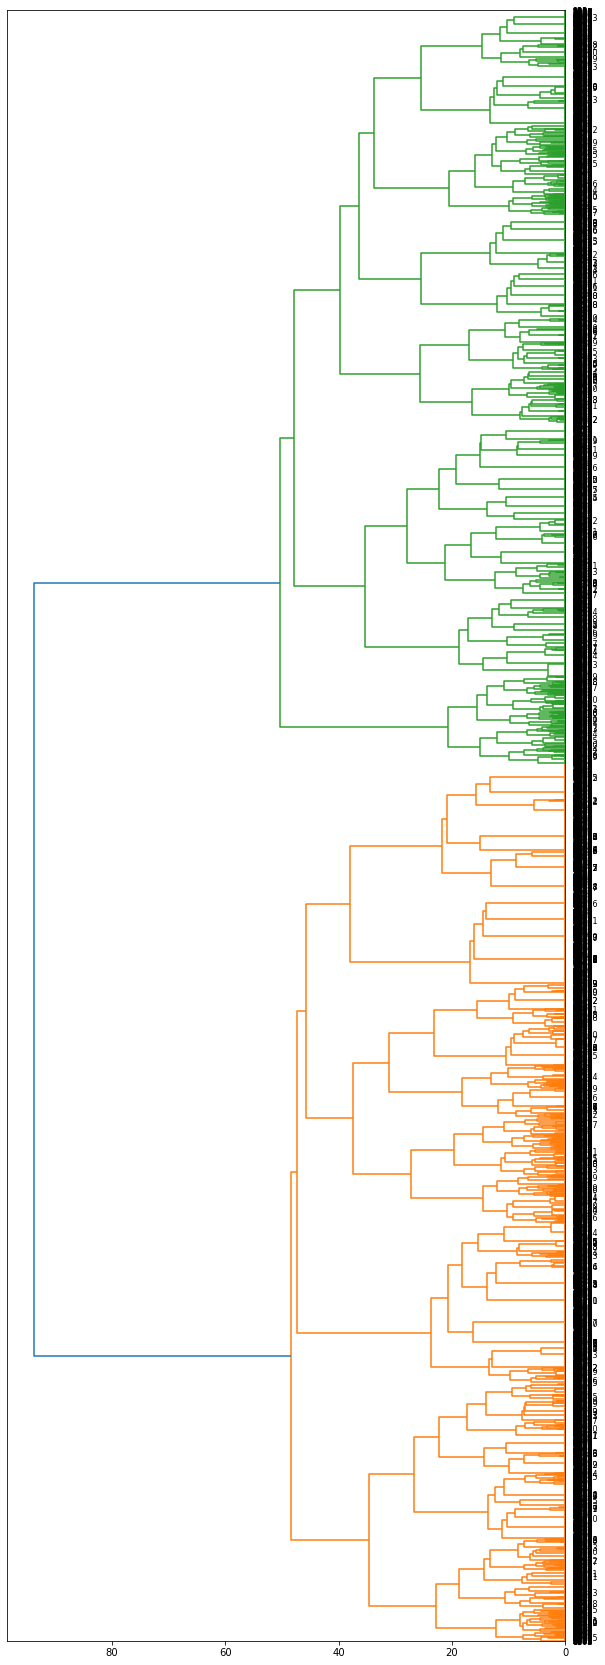

In [115]:

# Plot the dendogram
plots_dendogram_fontSize = 8
# Draw
fig, ax = plt.subplots(figsize=(10,30))
dg = dendrogram(hCluster,
                orientation='left',
                labels=A.index,
                leaf_font_size=plots_dendogram_fontSize)



In [116]:
A['cluster'] = fcluster(hCluster, t=5, criterion='maxclust')

In [117]:
A

,EducDeg_b'2 - High School',EducDeg_b'1 - Basic',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',isDateValid,age_bins_<20,age_bins_20-29,age_bins_30-39,age_bins_40-49,age_bins_50-59,...,claims_bins_0.0-0.4,claims_bins_0.4-0.8,claims_bins_0.8-1.2,claims_bins_>1.2,claims_bins_nan,ysc_bins_<20,ysc_bins_20-29,ysc_bins_30-39,ysc_bins_>=40,cluster
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
10292,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
10293,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
10294,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [118]:
clustersMeanDF = pd.DataFrame(A.groupby('cluster').mean())
clustersMeanDF.transpose()

cluster,1,2,3,4,5
EducDeg_b'2 - High School',0.599016,0.142490,0.453721,0.469004,0.375435
EducDeg_b'1 - Basic',0.137761,0.027263,0.506352,0.135254,0.167246
EducDeg_b'3 - BSc/MSc',0.000000,0.797582,0.038113,0.395742,0.403244
EducDeg_b'4 - PhD',0.263223,0.032665,0.001815,0.000000,0.054075
isDateValid,0.944649,0.815072,0.386570,0.641202,0.831209
age_bins_<20,0.009840,0.009516,0.245009,0.041954,0.031672
age_bins_20-29,0.061501,0.117798,0.421053,0.203507,0.201622
age_bins_30-39,0.117466,0.197531,0.058076,0.201002,0.157204
age_bins_40-49,0.263838,0.213220,0.030853,0.097057,0.090769
age_bins_50-59,0.234317,0.189300,0.052632,0.163431,0.129780


Evaluation of Model

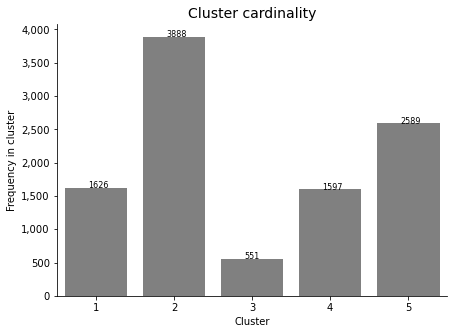

In [119]:
 # Plot clusters cardinality 

# Count observations per cluster
freqByCluster1 = A.groupby('cluster').size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(data=A, x='cluster', color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster1):
    plt.text(x=index-0.1 , y=data+1 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

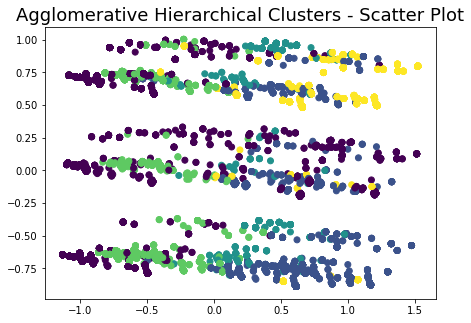

In [120]:
# Scatter plot of the two Principal Components by cluster to see if there is any pattern

# Draw
agc = AgglomerativeClustering(n_clusters = 5)

fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(A_forhier[:, 0], A_forhier[:, 1], c=agc.fit_predict(A_forhier), cmap='viridis')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

**Cluster Analysis**

Cluster 0: (not valid dates)

    is date valid: 26%
    agebins: 57% for 20-29
    yscbins: 62% for 30-39
    education: 41% for basic
    premiums: 69% for >1100
    claims: 48% for 0.8 to 1.2


cluster 1:

    is date valid: 69%
    agebins: 20% for 60-69
         26% for <20
    yscbins: 90% for 30-39
    education: 47% for high school, 43% bs/ms
    premiums: 99% for 700-1100
    claims: 62% for 0.4 to 0.8	


cluster 2:

    is date valid: 81%
    agebins: 23% for 20-29
         19% for 60-69
    yscbins: 74% for 20-29
    education: 36% for high school, 41% bs/ms
    premiums: 90% for 700-1100
    claims: 33% for 0.4 to 0.8
        34% for 0.8 to 1.2

cluster 3:

    is date valid: 95%
    agebins: 32% for 40-49
         29% for 50-59
    yscbins: 48% for 30-39
         47% for 20-29
    education: 61% bs/ms
    premiums: 100% for 0-700
    claims: 98% for 0.0 to 0.4

cluster 4:

    is date valid: 88%
    agebins: 20% for 40-49
         19% for 30-39
         19% for 60-69
    yscbins: 37% for 30-39
         39% for 20-29
    education: 53% bs/ms
    premiums: 86% for 0-700
    claims: 64% for 0.8 to 1.2